In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Loading the dataset

In [7]:
teleco_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
teleco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
teleco_data.shape

(7043, 21)

In [10]:
teleco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [11]:
#DataTypes
teleco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
teleco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen represents categorical values

Total charges have object dtype , that needs to be converted

Average monthly charges are USD 64.76

Maximum Tenure is 72 months and around 75 percent people have tenure less than 55 months


In [13]:
teleco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
(teleco_data['Churn'].value_counts() / len(teleco_data['Churn'])) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

So values are unbalanced one here

Text(0.5, 1.0, 'Count of Target Variables ')

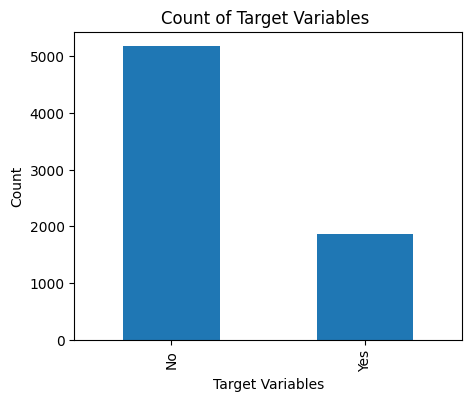

In [15]:
teleco_data['Churn'].value_counts().plot(kind = 'bar' , figsize = (5,4))
plt.xlabel('Target Variables')
plt.ylabel('Count')
plt.title('Count of Target Variables ')


The ratio is 73:27 which is highly unbalanced

In [16]:
teleco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Handling Missing Values**

In [17]:
telecom_data=teleco_data.copy()

In [18]:
# convert totalcharges into float
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'] , errors = 'coerce' )

In [19]:
telecom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Handling the missing values

In [20]:
telecom_data['TotalCharges'].isnull().sum()/ len(telecom_data['TotalCharges']) * 100

0.1561834445548772

So , there is about 0.15 percent of missing values , we can drop the missing values

In [21]:
telecom_data.loc[telecom_data['TotalCharges'].isnull() ==  True ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [22]:
telecom_data['TotalCharges'].dropna( inplace = True )

Dividing Tenure into different Groups

In [23]:
bins = ['{0}-{1}'.format(i,i+11) for i in range(1, 72 , 12 )]
telecom_data['TenureGroup'] = pd.cut(telecom_data['tenure'] , range(1,74,12) ,right = False   , labels = bins)

In [24]:
telecom_data['TenureGroup']

0        1-12
1       25-36
2        1-12
3       37-48
4        1-12
        ...  
7038    13-24
7039    61-72
7040     1-12
7041     1-12
7042    61-72
Name: TenureGroup, Length: 7043, dtype: category
Categories (6, object): ['1-12' < '13-24' < '25-36' < '37-48' < '49-60' < '61-72']

In [25]:
telecom_data.drop(columns = 'customerID' , axis = 1 , inplace = True)

In [26]:
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


**Data Exploration**

Univariate Analysis


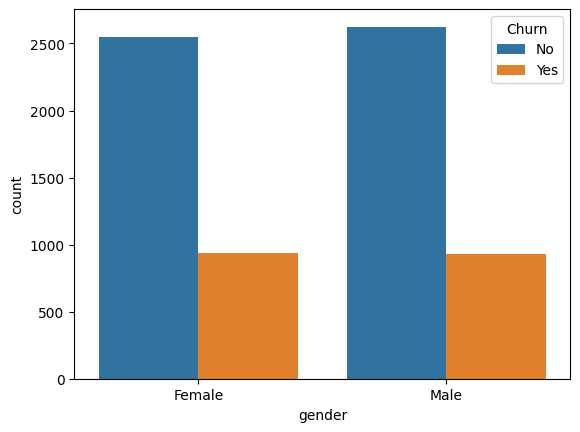

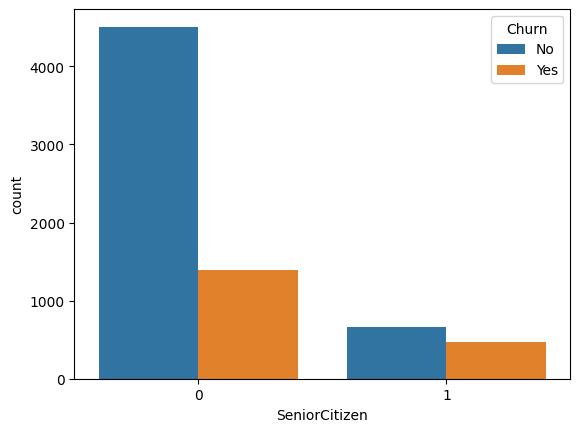

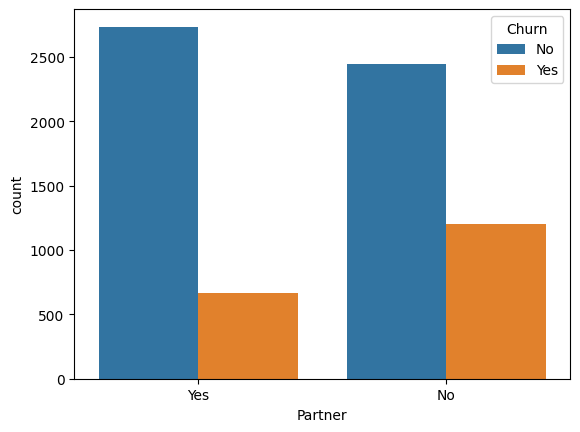

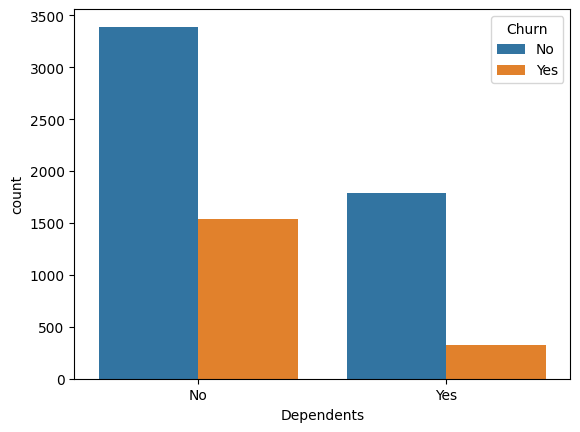

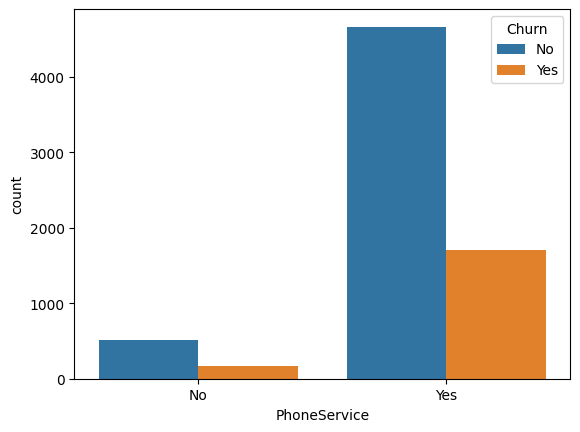

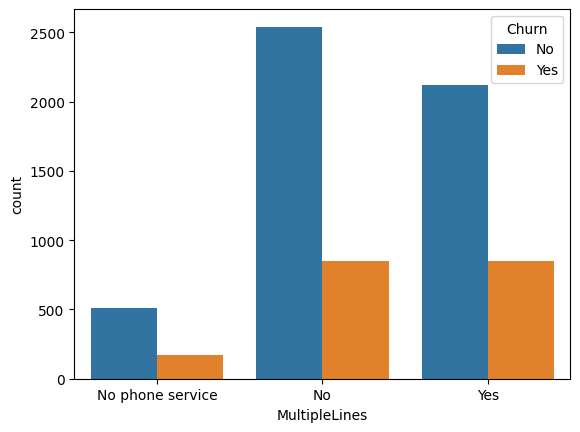

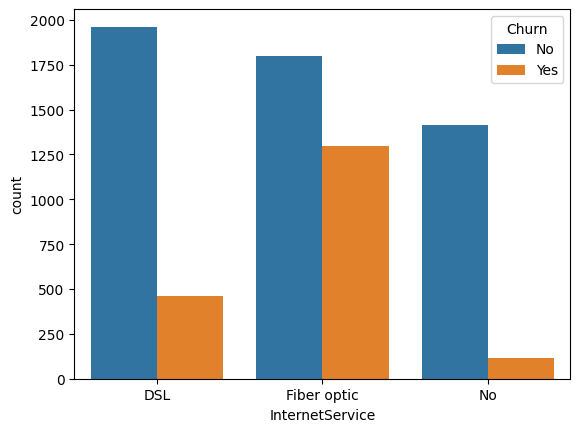

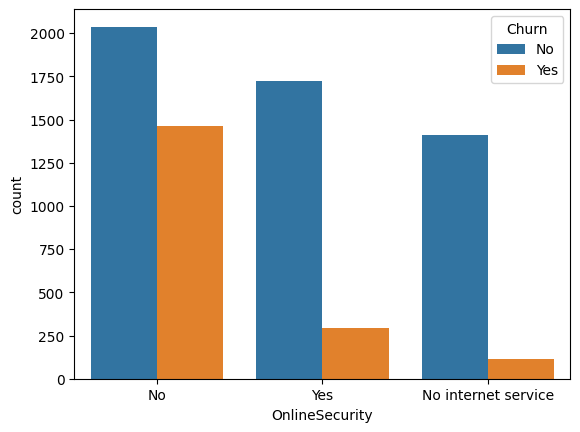

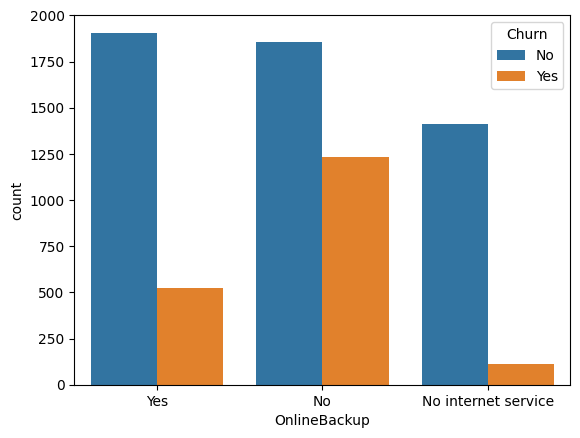

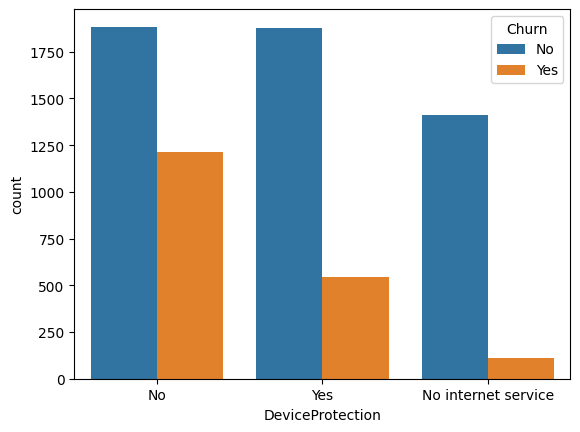

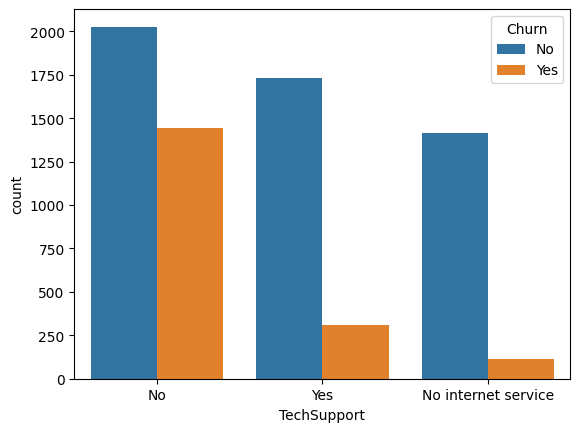

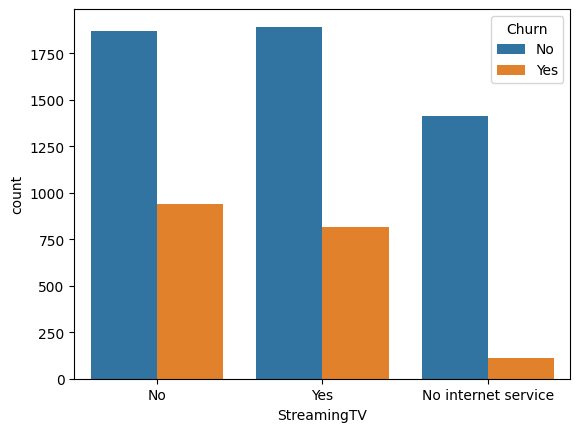

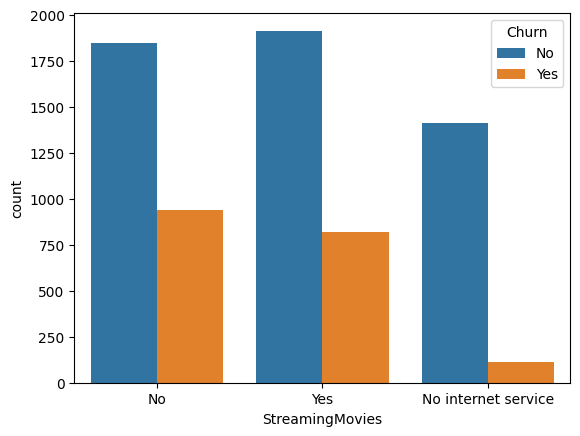

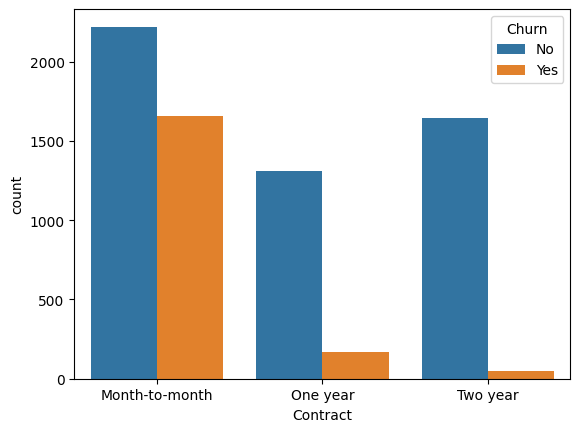

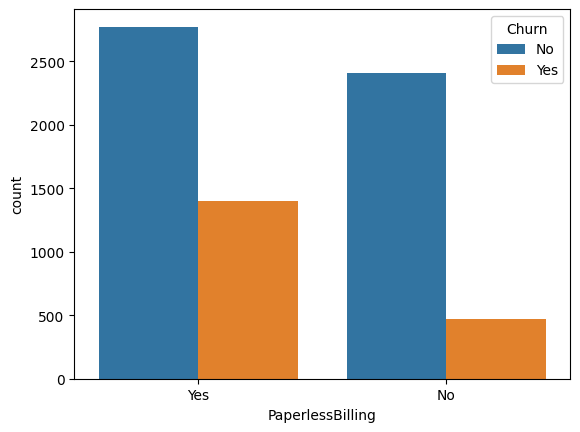

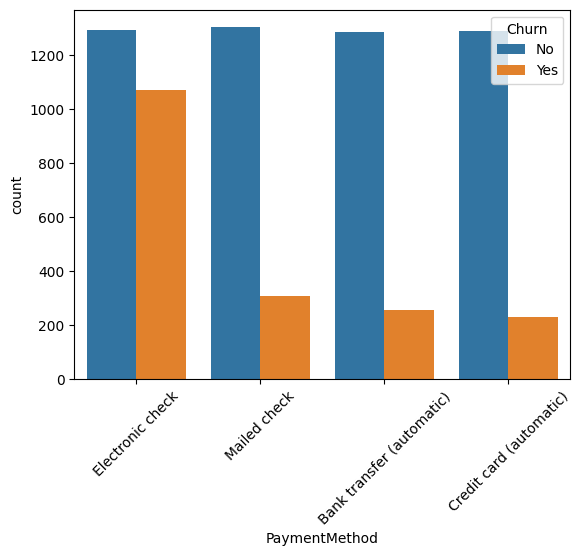

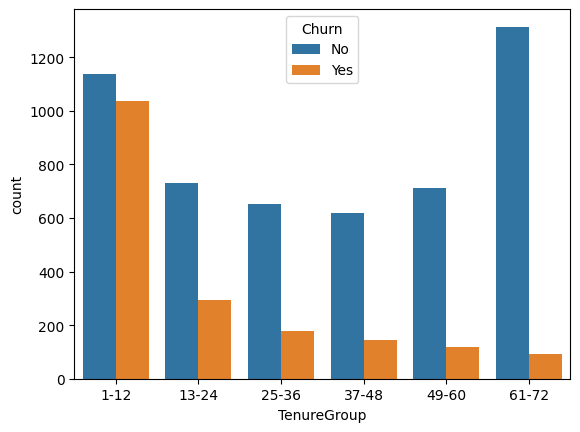

In [27]:
for i, predictor in  enumerate(telecom_data.drop(columns = ['TotalCharges' , 'MonthlyCharges' , 'Churn','tenure'])):

  plt.figure(i)
  if predictor == 'PaymentMethod':
    plt.xticks(rotation = 45)

  sns.countplot(data= telecom_data , x = predictor , hue='Churn' )



Converting target variable 'Churn' into 1 or 0


In [28]:
telecom_data['Churn'] = np.where(telecom_data['Churn'] == 'Yes' , 1, 0)

In [29]:
teleco_data_dummies = pd.get_dummies(telecom_data)

In [30]:
teleco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


We need to find relationship between Monthly and Total Charges

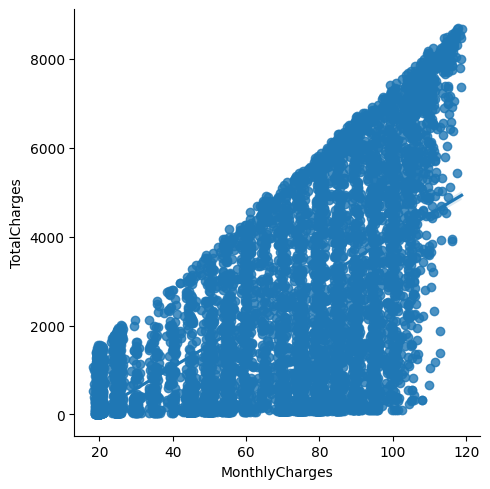

In [31]:
sns.lmplot(x = 'MonthlyCharges' , y = 'TotalCharges' , data = teleco_data_dummies)

Conclusion - As Monthly Charges increases , Total Charges also increases with it

Drawing kde plot ,estimating probability density function for two cases , Churn and not Churn


<ipython-input-32-cb690822700b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plot = sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies['Churn']== 0)] , color = 'red' , shade = True)
<ipython-input-32-cb690822700b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plot = sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies['Churn']== 1)] , ax = plot ,  color = 'blue' , shade = True)


Text(0.5, 1.0, 'Churn By Monthly Charges')

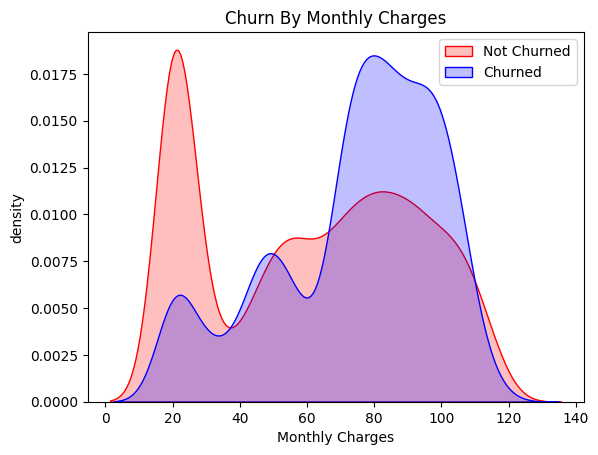

In [32]:
plot = sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies['Churn']== 0)] , color = 'red' , shade = True)
plot = sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies['Churn']== 1)] , ax = plot ,  color = 'blue' , shade = True)
plot.legend(['Not Churned' , 'Churned'] , loc ='upper right' )
plot.set_xlabel('Monthly Charges')
plot.set_ylabel('density')
plot.set_title('Churn By Monthly Charges')

Conclusion :- **Churn is higher when Monthly Charges are higher**

<ipython-input-33-d5358f99630b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plot = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies['Churn']== 0)] , color = 'red' , shade = True)
<ipython-input-33-d5358f99630b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  plot = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies['Churn']== 1)] , ax = plot ,  color = 'blue' , shade = True)


Text(0.5, 1.0, 'Churn By Total Charges')

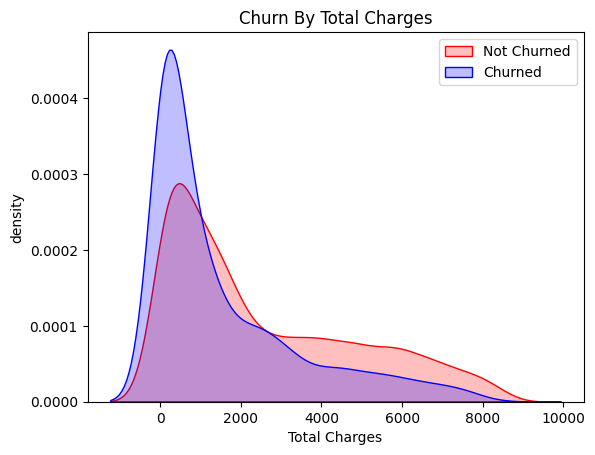

In [33]:
plot = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies['Churn']== 0)] , color = 'red' , shade = True)
plot = sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies['Churn']== 1)] , ax = plot ,  color = 'blue' , shade = True)
plot.legend(['Not Churned' , 'Churned'] , loc ='upper right' )
plot.set_xlabel('Total Charges')
plot.set_ylabel('density')
plot.set_title('Churn By Total Charges')

Churn is higher at **lower Total Charges**

All the three factors combines to the Churn - which is higher Monthly Charge at lower tenure results into lower Total Charges

<Axes: >

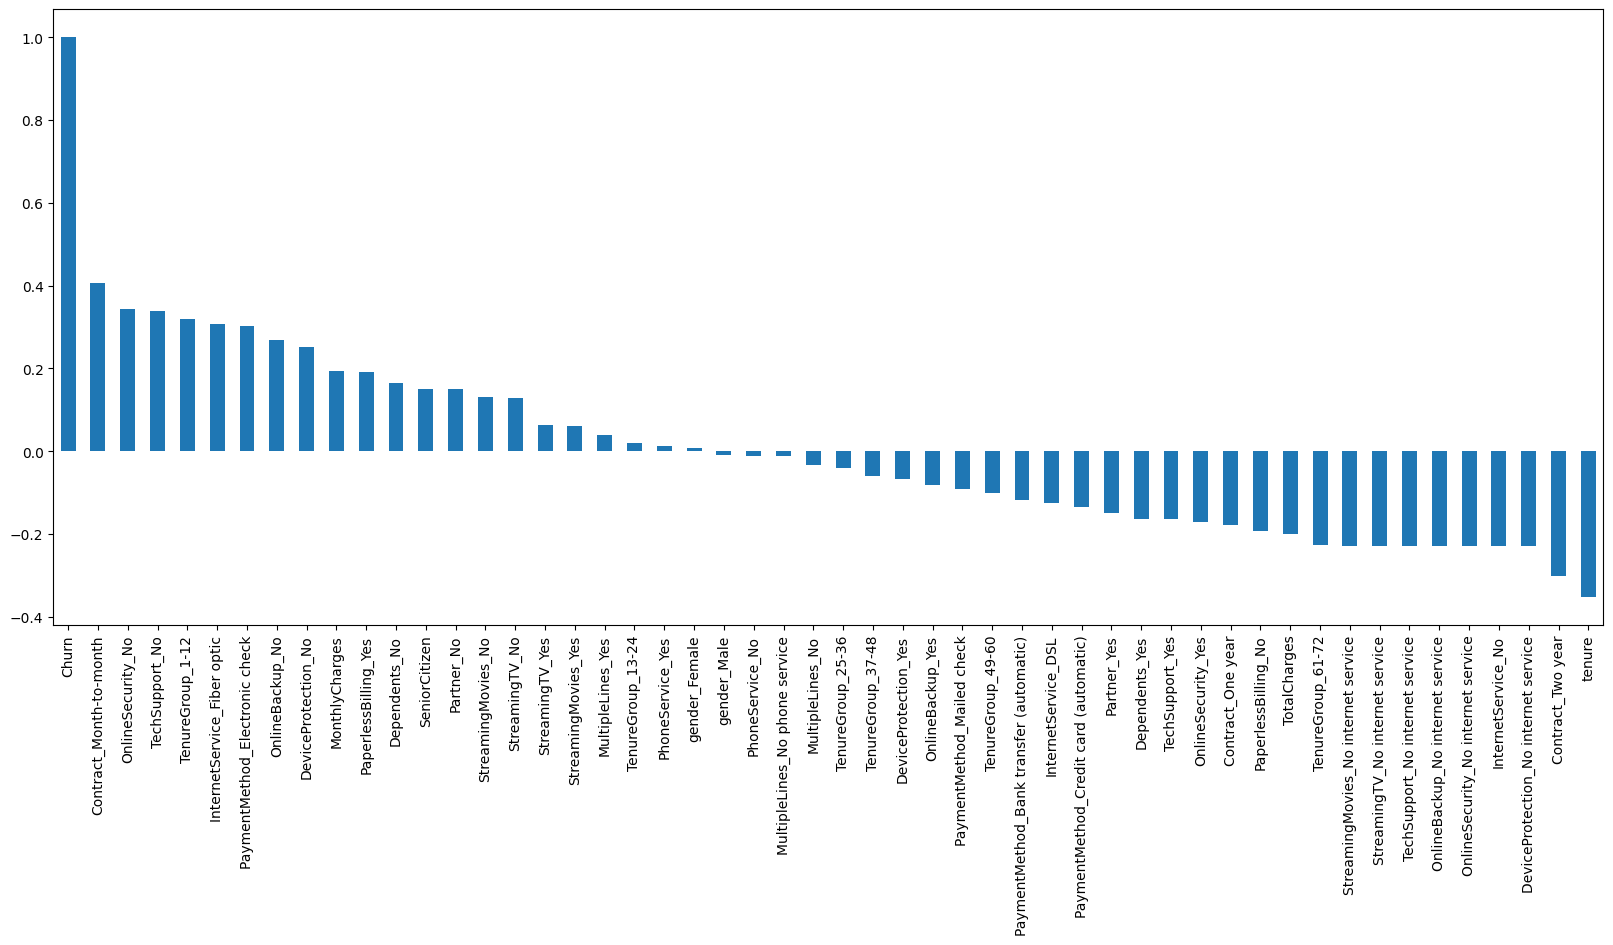

In [34]:

plt.figure(figsize = (20,8))
teleco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind= 'bar')

**Higher Churn** could be seen in case of month-month Contract , no online security , no Tech support , Fiber Optic as Internet Service , low tenure group
**Lower Churn** could be seen in higher Contract Type , higher Tenure Group , subscription without Internet Service .


Gender , Availability of Phone Service ,Multiple Lines have **no effect on Churn**

<Axes: >

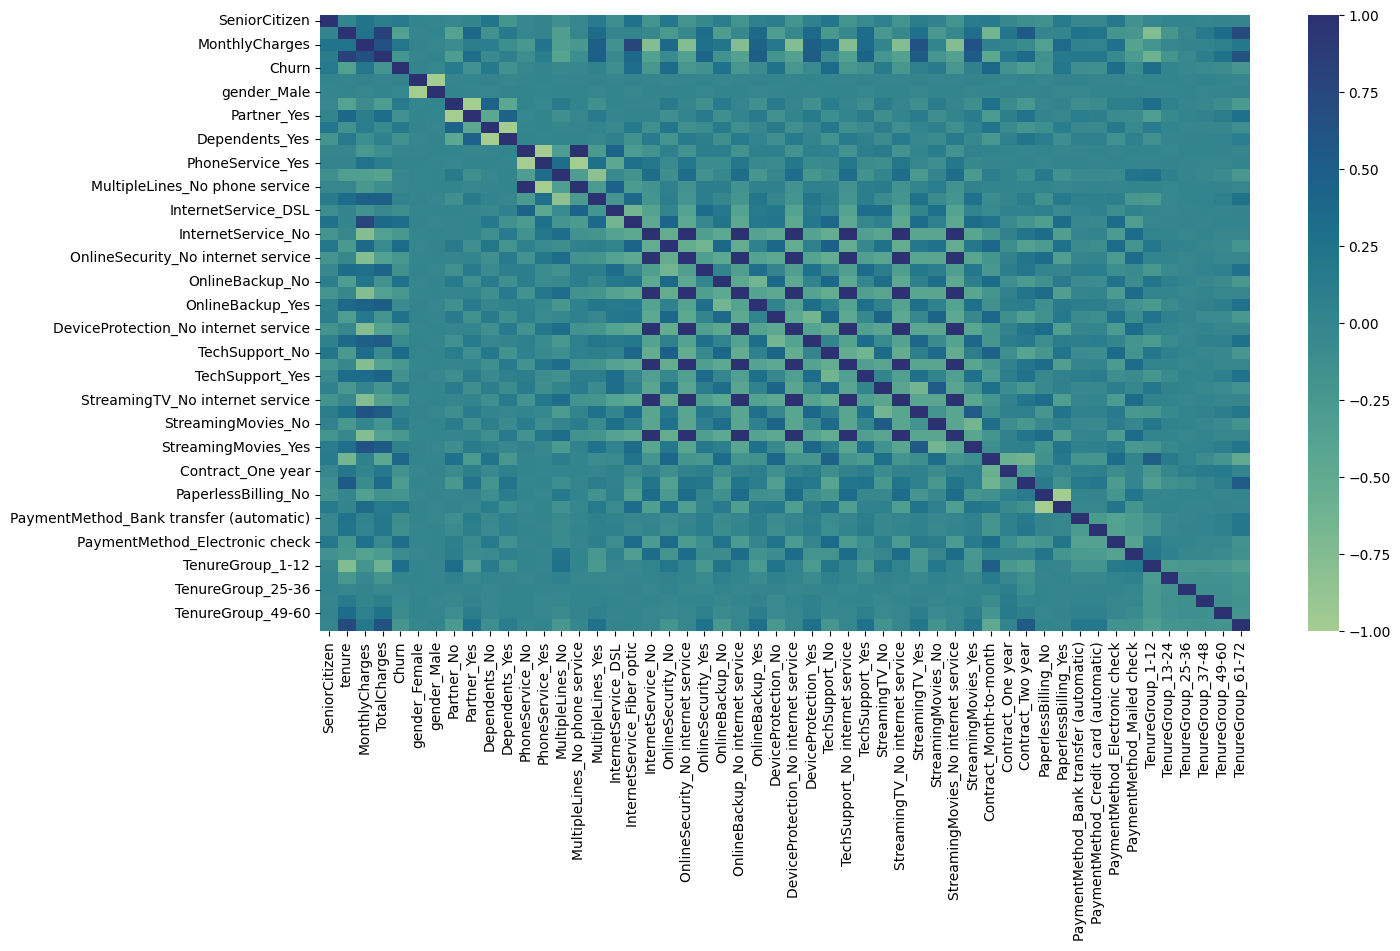

In [35]:
plt.figure(figsize = (15 , 8))
sns.heatmap(teleco_data_dummies.corr(), cmap ='crest' , cbar = True)

**Bivariate Analysis**

In [36]:
new_df1_target0=telecom_data.loc[telecom_data["Churn"]==0]
new_df1_target1=telecom_data.loc[telecom_data["Churn"]==1]

In [37]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30



    fig, ax = plt.subplots()

    plt.xticks(rotation=45)

    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()


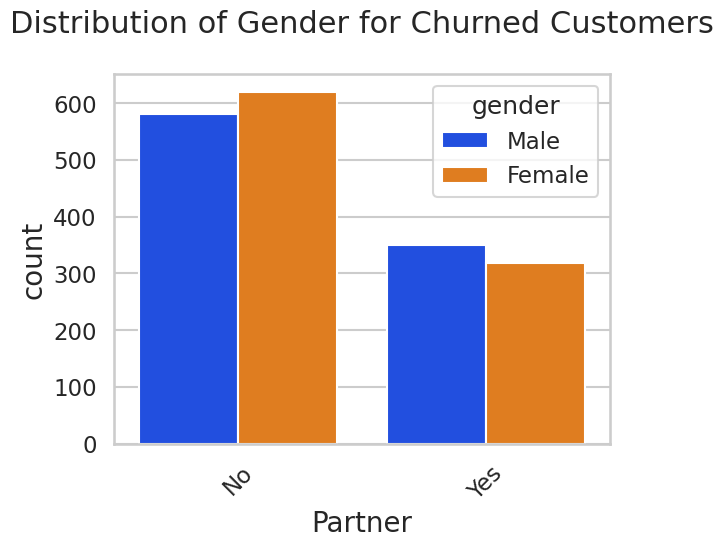

In [38]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

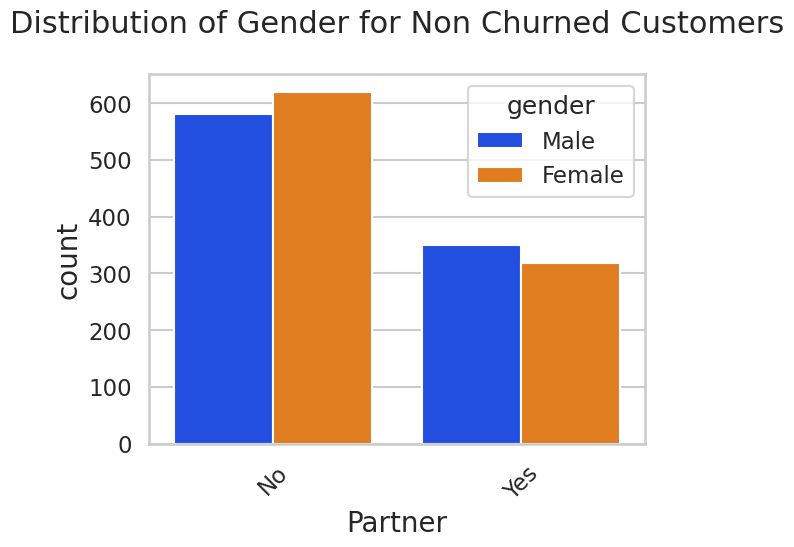

In [39]:
uniplot(new_df1_target1 , col = 'Partner' , title='Distribution of Gender for Non Churned Customers',hue ='gender' )

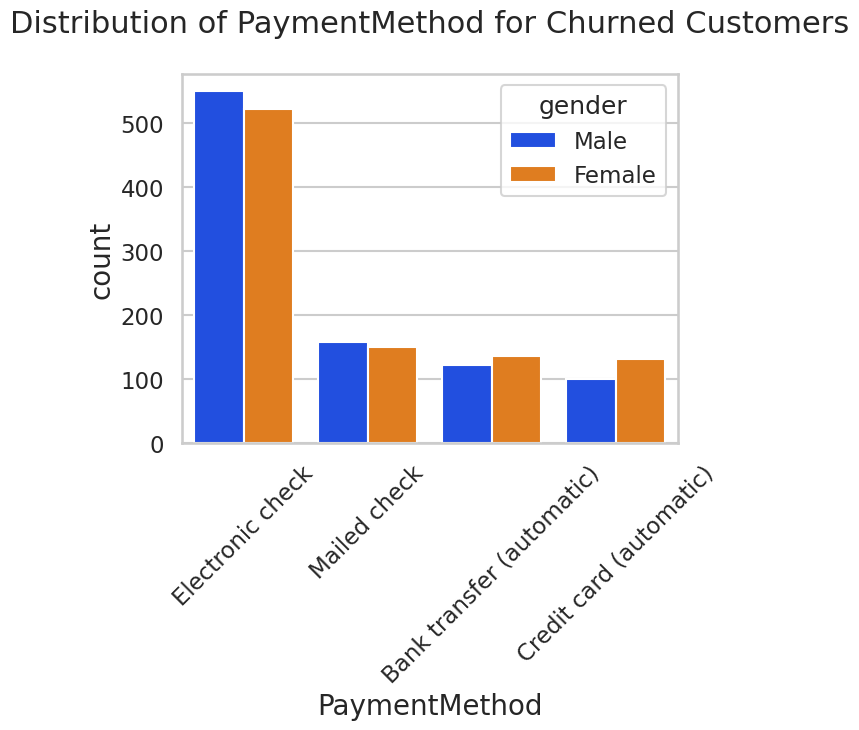

In [40]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

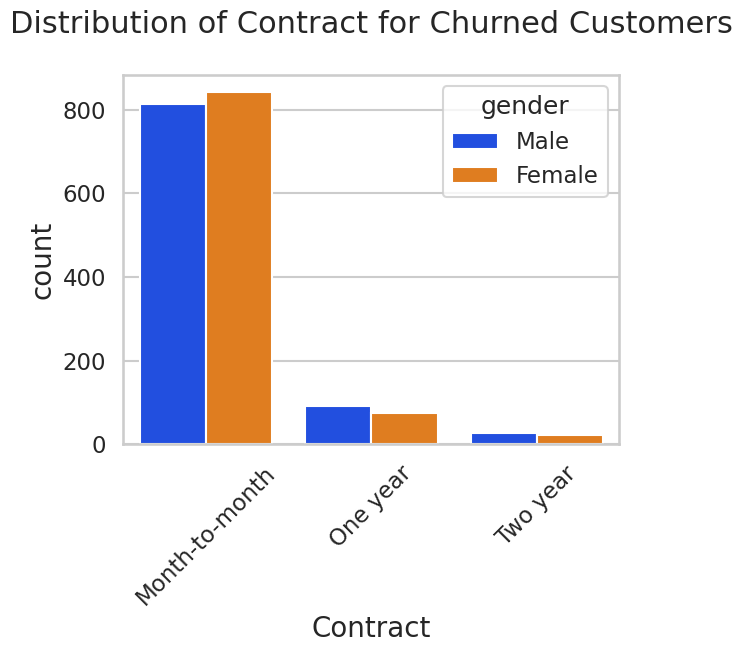

In [41]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

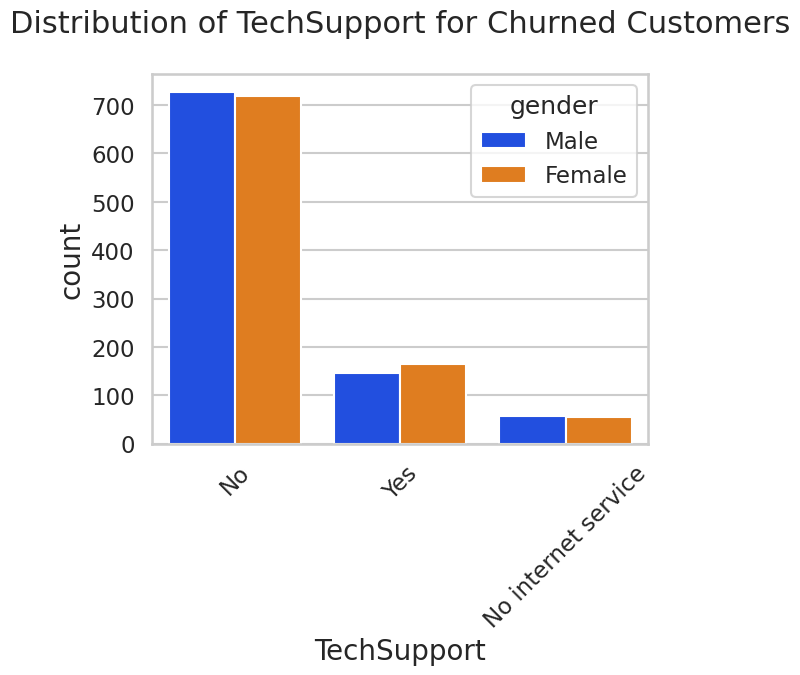

In [42]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

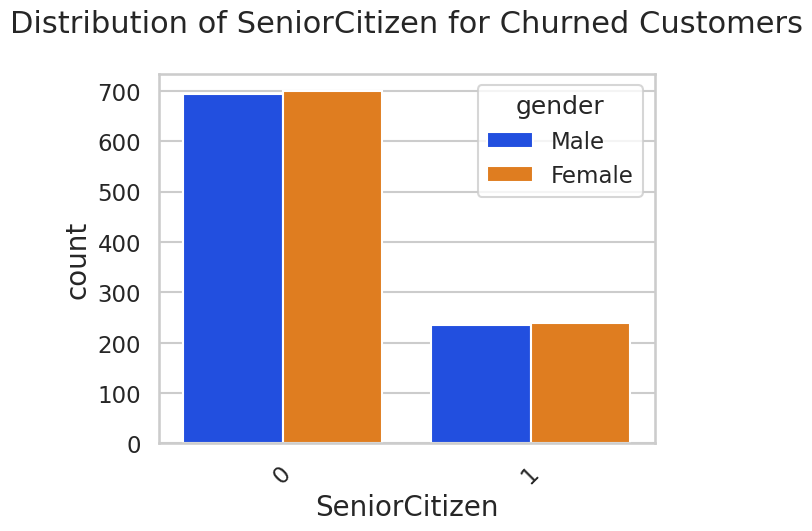

In [43]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

Conclusions -

1 Non Senior Citizens are high Churners

2 Customers who have month to month contract rather than yearly contract are high churners

3 Customers with Electronic Check as payment method are high churners  
4 No Online security, No Tech Support category are high churners


In [46]:
teleco_data_dummies.to_csv('telecom_churn.csv')